<a href="https://colab.research.google.com/github/CoralBau/Proyecto-ASE/blob/ASE/ASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kneed
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
!apt-get -qq install -y graphviz && pip install pydot
!pip install cartopy
import pydot
import cartopy
import libarchive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io as io
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from google.colab import files
uploaded = files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123996 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

Saving ASE.csv to ASE.csv


In [ ]:
ase = pd.read_csv(io.BytesIO(uploaded['ASE.csv']), encoding="utf8")
ase

,Entidad Federativa,Año,Porcentaje,Tipo
0,Nacional,2008,44.40,Pobreza
1,Nacional,2010,46.10,Pobreza
2,Nacional,2012,45.50,Pobreza
3,Nacional,2014,46.20,Pobreza
4,Nacional,2016,43.20,Pobreza
...,...,...,...,...
1843,Zacatecas,2012,25.65,Cobertura Educación Superior
1844,Zacatecas,2014,29.14,Cobertura Educación Superior
1845,Zacatecas,2016,31.85,Cobertura Educación Superior
1846,Zacatecas,2018,34.06,Cobertura Educación Superior


In [ ]:
efs = ase["Entidad Federativa"].unique()
anos = ase["Año"].unique()

df = pd.DataFrame(columns=["Entidad", "Año","Pobreza", "Carencias sociales", "Rezago Educativo", 
                           "Cobertura Preescolar", "Cobertura Primaria", "Cobertura Secundaria",
                           "Cobertura Educación Media", "Cobertura Educación Superior"])
i = 0
for ef in efs:
    data_ef = ase[ase["Entidad Federativa"] == ef]
    for ano in anos:
        data_ef_ano = data_ef[data_ef["Año"] == ano]
        row = list()
        row.append(ef)
        row.append(ano)
        values = data_ef_ano["Porcentaje"].tolist()
        for val in values:
            row.append(val)
        df.loc[i] = row
        i = i + 1

df = df.sort_values(['Año', "Entidad"]).reset_index(drop=True)
df
df2 = df['Entidad']
        
#groupby todos los estados por columna y año

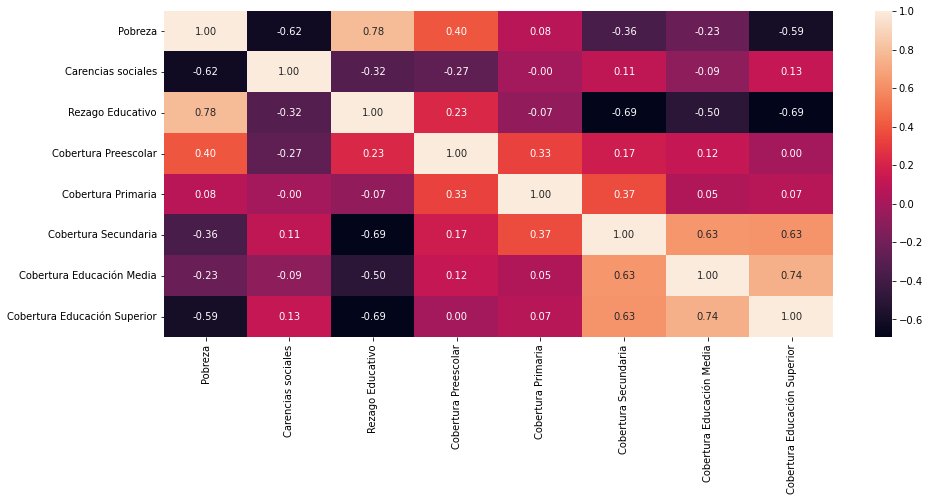

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Entidad'] = encoder.fit_transform(df['Entidad'])
df['Año'] = encoder.fit_transform(df['Año'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entidad                       231 non-null    int64  
 1   Año                           231 non-null    int64  
 2   Pobreza                       231 non-null    float64
 3   Carencias sociales            231 non-null    float64
 4   Rezago Educativo              231 non-null    float64
 5   Cobertura Preescolar          231 non-null    float64
 6   Cobertura Primaria            231 non-null    float64
 7   Cobertura Secundaria          231 non-null    float64
 8   Cobertura Educación Media     231 non-null    float64
 9   Cobertura Educación Superior  231 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 18.2 KB


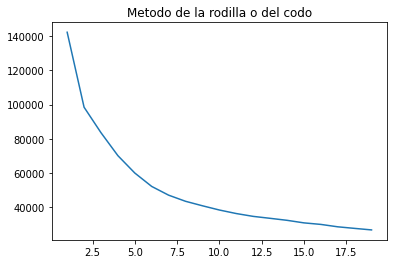

In [ ]:
wcss = []

for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300,
                  n_init = 10, random_state = 2022)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title("Metodo de la rodilla o del codo")
#plt.xlabel("Numero de labelss (k)")
#plt.ylabel("WCSS")
plt.show()

In [ ]:
kl = KneeLocator(range(1,20), wcss, curve="convex", direction="decreasing")
print("Elbow: ", kl.elbow)

Elbow:  6


In [ ]:
kmeans = KMeans(n_clusters=3,init="k-means++", max_iter=300,
                n_init=10,random_state=2022)
y_kmeans = kmeans.fit(df)
print(kmeans.cluster_centers_)

[[ 20.02         2.75        55.959       24.722       23.392
   74.0122      99.0765      82.0273      55.0264      24.9575    ]
 [ 13.32258065   3.2016129   34.10241935  30.11370968  16.87903226
   66.16951613  97.60322581  83.72177419  57.64483871  32.13612903]
 [  6.           3.          28.94285714  29.3          9.41428571
   79.93571429 109.86714286 103.30285714  81.75428571  61.33      ]]


In [ ]:
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(df)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=["CP1","CP2"])
principalDf["labels"] = kmeans.labels_
principalDf

,CP1,CP2,labels
0,-0.405121,-2.259275,1
1,0.135872,-3.965542,1
2,0.940630,-3.080907,1
3,-1.893231,-1.790276,1
4,-5.711829,0.967955,0
...,...,...,...
226,1.440705,0.205806,1
227,0.395302,2.220447,0
228,-1.807704,0.413818,0
229,0.205690,2.130039,0


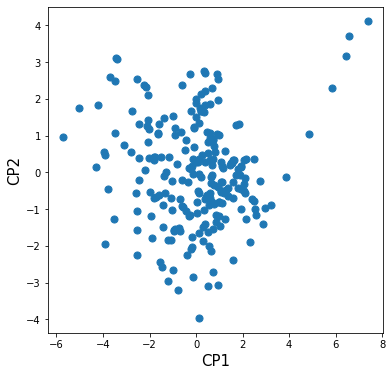

In [ ]:
fig = plt.figure(figsize = (6,6) )
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('CP1', fontsize=15)
ax.set_ylabel('CP2', fontsize=15)

color_theme = np.array(['blue', 'red', 'yellow', 'pink', 'orange'])
ax.scatter(x = principalDf.CP1, y = principalDf.CP2, s = 50)
plt.show()

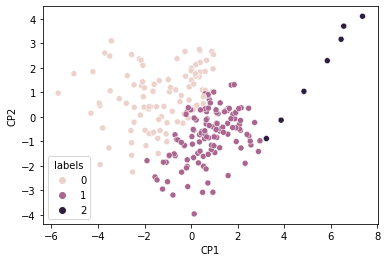

In [ ]:
sns.scatterplot(data=principalDf,x = 'CP1', y = 'CP2',hue='labels')

In [ ]:
principalDf['entidad'] = df2

In [ ]:
principalDf[principalDf['labels']==2]

,CP1,CP2,labels,entidad
6,3.239224,-0.887124,2,Ciudad de México
39,3.872429,-0.135056,2,Ciudad de México
72,4.853909,1.040537,2,Ciudad de México
105,5.856839,2.293693,2,Ciudad de México
138,6.451621,3.169326,2,Ciudad de México
171,6.564959,3.704582,2,Ciudad de México
204,7.372846,4.108684,2,Ciudad de México


In [ ]:
principalDf[principalDf['labels']==1]

,CP1,CP2,labels,entidad
0,-0.405121,-2.259275,1,Aguascalientes
1,0.135872,-3.965542,1,Baja California
2,0.940630,-3.080907,1,Baja California Sur
3,-1.893231,-1.790276,1,Campeche
5,-0.777657,-3.194904,1,Chihuahua
...,...,...,...,...
217,2.155075,0.368619,1,Nuevo León
220,2.052326,0.339503,1,Querétaro
223,2.474524,0.351720,1,Sinaloa
224,2.126114,-0.147124,1,Sonora


In [28]:
principalDf[principalDf['labels']==0]

,CP1,CP2,labels,entidad,Año
4,-5.711829,0.967955,0,Chiapas,0
9,-1.427053,-0.879334,0,Durango,0
10,-2.518632,-2.254150,0,Guanajuato,0
11,-4.300642,0.150538,0,Guerrero,0
12,-1.329647,-0.556150,0,Hidalgo,0
...,...,...,...,...,...
225,0.962723,2.545565,0,Tabasco,6
227,0.395302,2.220447,0,Tlaxcala,6
228,-1.807704,0.413818,0,Veracruz de Ignacio de la Llave,6
229,0.205690,2.130039,0,Yucatán,6


In [29]:
principalDf[principalDf['labels']==1]

,CP1,CP2,labels,entidad,Año
0,-0.405121,-2.259275,1,Aguascalientes,0
1,0.135872,-3.965542,1,Baja California,0
2,0.940630,-3.080907,1,Baja California Sur,0
3,-1.893231,-1.790276,1,Campeche,0
5,-0.777657,-3.194904,1,Chihuahua,0
...,...,...,...,...,...
217,2.155075,0.368619,1,Nuevo León,6
220,2.052326,0.339503,1,Querétaro,6
223,2.474524,0.351720,1,Sinaloa,6
224,2.126114,-0.147124,1,Sonora,6


In [30]:
principalDf[principalDf['labels']==2]

,CP1,CP2,labels,entidad,Año
6,3.239224,-0.887124,2,Ciudad de México,0
39,3.872429,-0.135056,2,Ciudad de México,1
72,4.853909,1.040537,2,Ciudad de México,2
105,5.856839,2.293693,2,Ciudad de México,3
138,6.451621,3.169326,2,Ciudad de México,4
171,6.564959,3.704582,2,Ciudad de México,5
204,7.372846,4.108684,2,Ciudad de México,6


In [ ]:
principalDf['Año']=df['Año']

In [ ]:
df_2008=principalDf[principalDf['Año']==0]
df_2009=principalDf[principalDf['Año']==1]
df_2010=principalDf[principalDf['Año']==2]
df_2011=principalDf[principalDf['Año']==3]
df_2012=principalDf[principalDf['Año']==4]
df_2013=principalDf[principalDf['Año']==5]
df_2014=principalDf[principalDf['Año']==6]

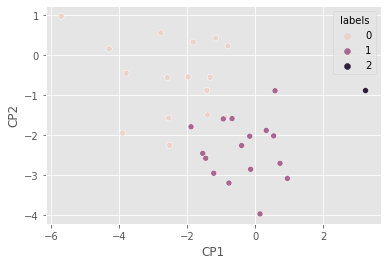

In [ ]:
sns.scatterplot(data=df_2008,x = 'CP1', y = 'CP2',hue='labels')

(0.0, 1.0, 0.0, 1.0)

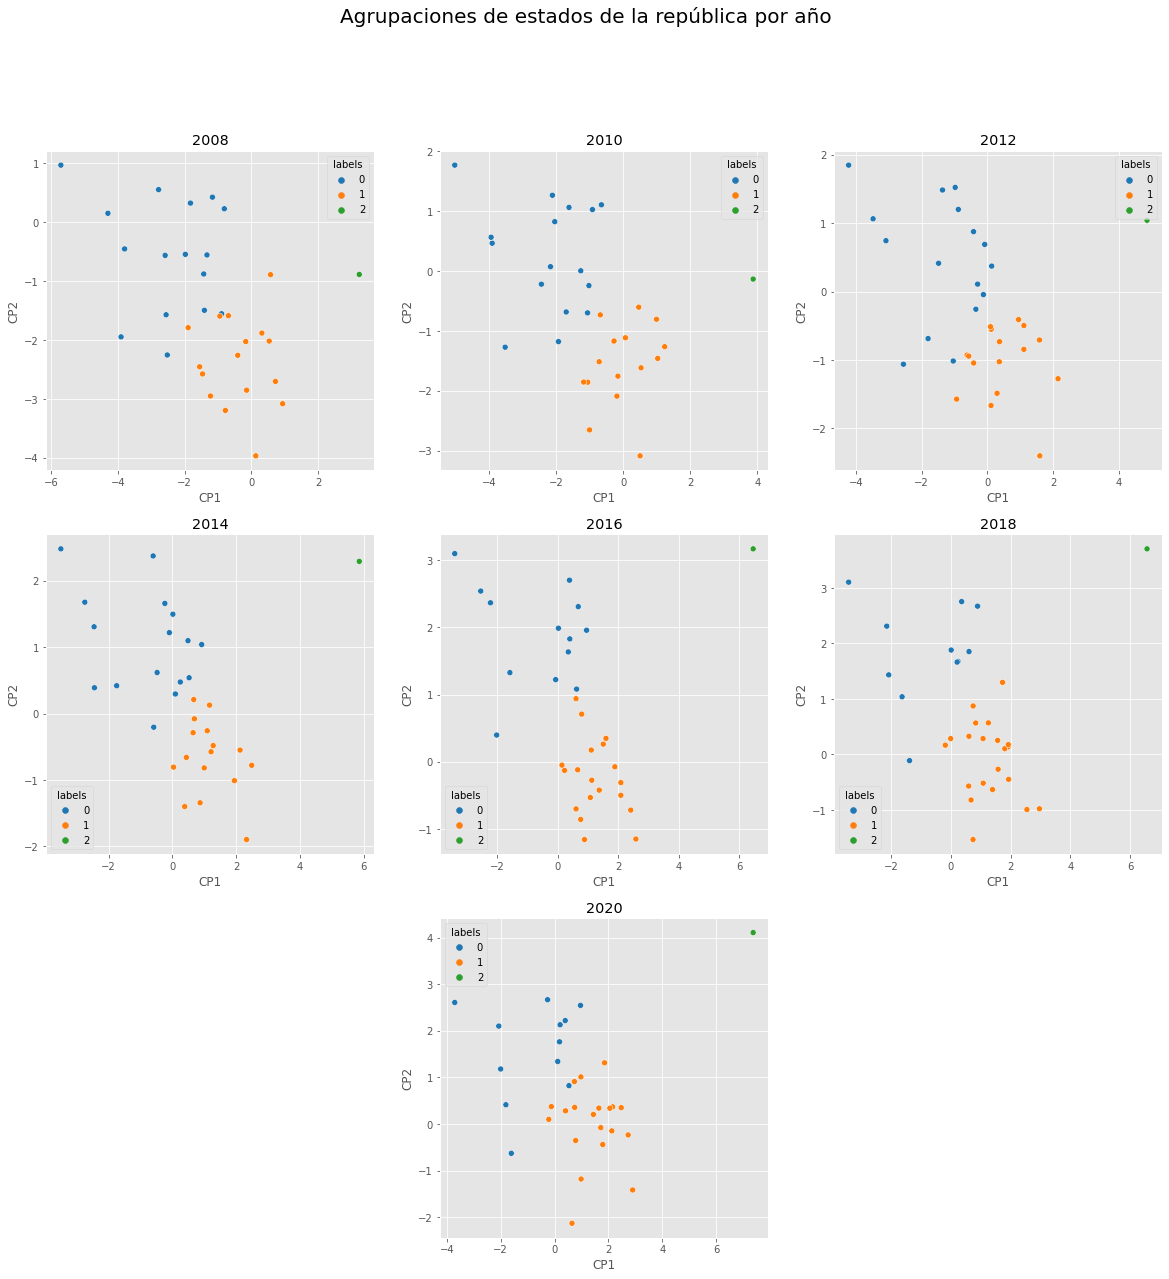

In [25]:
fig,axs = plt.subplots(3,3,figsize=(20,20))
plt.style.use('ggplot')
plt.suptitle('Agrupaciones de estados de la república por año',fontsize=20)
sns.scatterplot(data=df_2008,x = 'CP1', y = 'CP2',hue='labels',ax=axs[0][0],palette='tab10')
axs[0][0].set_title('2008')
sns.scatterplot(data=df_2009,x = 'CP1', y = 'CP2',hue='labels',ax=axs[0][1],palette='tab10')
axs[0][1].set_title('2010')
sns.scatterplot(data=df_2010,x = 'CP1', y = 'CP2',hue='labels',ax=axs[0][2],palette='tab10')
axs[0][2].set_title('2012')
sns.scatterplot(data=df_2011,x = 'CP1', y = 'CP2',hue='labels',ax=axs[1][0],palette='tab10')
axs[1][0].set_title('2014')
sns.scatterplot(data=df_2012,x = 'CP1', y = 'CP2',hue='labels',ax=axs[1][1],palette='tab10')
axs[1][1].set_title('2016')
sns.scatterplot(data=df_2013,x = 'CP1', y = 'CP2',hue='labels',ax=axs[1][2],palette='tab10')
axs[1][2].set_title('2018')
sns.scatterplot(data=df_2014,x = 'CP1', y = 'CP2',hue='labels',ax=axs[2][1],palette='tab10')
axs[2][1].set_title('2020')
axs[2][0].axis('off')
axs[2][2].axis('off')